# INFO 2950 Final Project<br>Appendix
Astrid Day (fkd6), Jasmine Yu (jzy7), Stephanie Zhang (swz8)

In the following file, we append analysis that we carried out but ultimately did not include in the final version of our project.

## Data Cleaning
Loading in the necessary modules and cleaning the datasets to match the main document's data structure. See our main file, proj5.ipynb, for an explanation of the steps we took in data cleaning.

In [6]:
# Load all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import f_oneway, chi2_contingency, ttest_ind
import re
import seaborn as sns
from sklearn.linear_model import LinearRegression
sns.set_style('white')

In [7]:
#Loading the datasets
listings_original = pd.read_csv('listings.csv')
bookings_original = pd.read_csv('calendar.csv')

#Listings dataset cleaning
listings_clean = listings_original[['id', 'name', 'host_id', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'neighbourhood_group_cleansed', 'accommodates', 'bathrooms_text', 'bedrooms', 'amenities', 'price', 'minimum_nights', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']].copy()
listings_clean.rename(columns={'bathrooms_text':'bathrooms', 'host_response_rate':'host_response_percent', 'host_acceptance_rate':'host_acceptance_percent'}, inplace=True)
listings_clean = listings_clean.dropna()

#Convert bathrooms column into floats
listings_clean['bathrooms'].replace('Half-bath', '0.5', inplace=True)
listings_clean['bathrooms'].replace('Shared half-bath', '0.5', inplace=True)
listings_clean['bathrooms'].replace('Private half-bath', '0.5', inplace=True)
for i in listings_clean.index:
    listings_clean.loc[i, 'bathrooms'] = re.sub("[^0-9,.]", "", listings_clean.loc[i, 'bathrooms'])
listings_clean['bathrooms'] = pd.to_numeric(listings_clean['bathrooms'], downcast="float")

#Convert price column into floats
for i in listings_clean.index:
    listings_clean.loc[i, 'price'] = listings_clean.loc[i, 'price'].strip("$").replace(",", "")
listings_clean['price'] = pd.to_numeric(listings_clean['price'], downcast="float")

#Convert host response and acceptance percents into floats
for i in listings_clean.index:
    listings_clean.loc[i, 'host_response_percent'] = listings_clean.loc[i, 'host_response_percent'].strip("%")
    listings_clean.loc[i, 'host_acceptance_percent'] = listings_clean.loc[i, 'host_acceptance_percent'].strip("%")
listings_clean['host_response_percent'] = pd.to_numeric(listings_clean['host_response_percent'], downcast="float")
listings_clean['host_acceptance_percent'] = pd.to_numeric(listings_clean['host_acceptance_percent'], downcast="float")

#Bookings dataset cleaning
bookings_clean = bookings_original[['listing_id', 'available']].copy()
bookings_clean.rename(columns={'listing_id':'id'}, inplace=True)
booked_gb = bookings_clean[bookings_clean['available'] == 'f'].groupby('id')
booked_df = booked_gb['available'].value_counts().to_frame()
booked_df.rename(columns={'available':'days_booked'}, inplace=True)
booked_df['percent_booked'] = round((booked_df['days_booked'] / 365) * 100, 2)
booked_df = booked_df.dropna()

#Merge listings and bookings datasets
airbnb_data = pd.merge(listings_clean, booked_df, on='id', how='inner')
airbnb_data.head()

,id,name,host_id,host_response_percent,host_acceptance_percent,host_is_superhost,neighbourhood_group_cleansed,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,days_booked,percent_booked
0,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,50.0,86.0,f,Brooklyn,3,1.0,1.0,...,4.46,4.59,4.50,4.79,4.81,4.72,4.65,5.03,157,43.01
1,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,50.0,33.0,f,Brooklyn,4,1.5,2.0,...,5.00,5.00,5.00,5.00,5.00,4.50,5.00,0.02,161,44.11
2,5178,Large Furnished Room Near B'way,8967,100.0,100.0,f,Manhattan,2,1.0,1.0,...,4.21,4.20,3.73,4.66,4.40,4.86,4.36,3.64,122,33.42
3,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,100.0,100.0,t,Brooklyn,2,1.5,1.0,...,4.70,4.71,4.62,4.80,4.82,4.86,4.74,1.44,32,8.77
4,6990,UES Beautiful Blue Room,16800,100.0,100.0,f,Manhattan,1,1.0,1.0,...,4.88,4.81,4.96,4.96,4.95,4.84,4.84,1.86,78,21.37


## Boxplots
We created boxplots to visualize the distribution of ratings based on specific variables, but we decided to move them to the appendix since they did not produce results that provided strong conclusions or would be suitable for further analysis. The boxplots also generally repeated the conclusions drawn from our linear regressions, as they too produced low values for correlation and covariance, showing a weak relationship between the variables and a listing's rating. Our ANOVA test further confirmed these same results. 

### A. Boxplots of Host Attributes

**_Ratings by host response percentage:_**

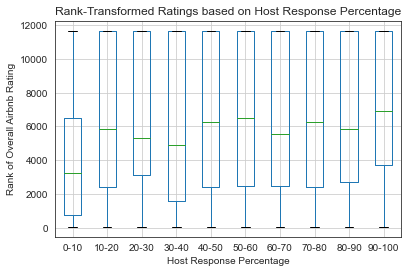

In [8]:
# Creation of column for categorizing host response percentage into bins
host_response_percent_interval = pd.cut(airbnb_data['host_response_percent'],bins=[0,10,20,30,40,50,60,70,80,90,100],labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100'])
airbnb_data['host_response_percent_interval'] = host_response_percent_interval

# Rank transformation of overall rating
airbnb_data['rank_review_scores_rating'] = airbnb_data['review_scores_rating'].rank()

# Boxplot of rank-transformed ratings by host response percentage
airbnb_data.boxplot('rank_review_scores_rating', by = 'host_response_percent_interval')
plt.title('Rank-Transformed Ratings based on Host Response Percentage')
plt.suptitle('')
plt.xlabel('Host Response Percentage')
plt.ylabel('Rank of Overall Airbnb Rating')
plt.show()

The boxplot does not highlight a strong apparent relationship between rating and host response percentage, as all of the boxes have overlapping interquartile ranges and close median lines. There may be a slight upward trend in medians as host response percentage increases, and the scatterplot on the main document also had a Spearman correlation value of 0.125. However, this number is only considered high relative to the other correlations we found and does not represent a strong relationship overall. 

**_Ratings by host acceptance percentage:_**

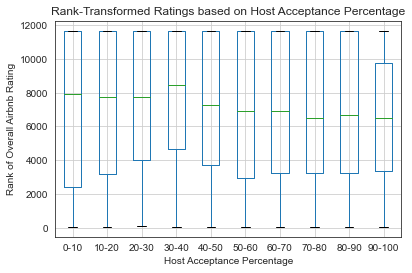

In [9]:
# Creation of column for categorizing host acceptance percentage into bins
host_acceptance_percent_interval = pd.cut(airbnb_data['host_acceptance_percent'],bins=[0,10,20,30,40,50,60,70,80,90,100],labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100'])
airbnb_data['host_acceptance_percent_interval'] = host_acceptance_percent_interval

# Boxplot of rank-transformed ratings by host acceptance percentage
airbnb_data.boxplot('rank_review_scores_rating', by = 'host_acceptance_percent_interval')
plt.title('Rank-Transformed Ratings based on Host Acceptance Percentage')
plt.suptitle('')
plt.xlabel('Host Acceptance Percentage')
plt.ylabel('Rank of Overall Airbnb Rating')
plt.show()

Like the host response rate boxplots, these boxplots also do not show a strong relationship between rating and host acceptance percentage, as all of the boxes have overlapping interquartile ranges and close median lines. There may be a slight downward trend in medians as host acceptance percentage increases; however, the scatterplot on the main document did not have a strong correlation value, as its Spearman correlation was -0.033. 

**_Ratings by whether host is a superhost:_**

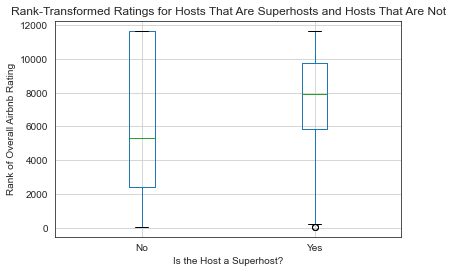

In [10]:
# Boxplot of rank-transformed ratings by whether host is superhost
airbnb_data.boxplot('rank_review_scores_rating', by='host_is_superhost')
plt.title("Rank-Transformed Ratings for Hosts That Are Superhosts and Hosts That Are Not")
plt.suptitle('')
plt.xlabel('Is the Host a Superhost?')
plt.xticks([1, 2], ['No', 'Yes'])
plt.ylabel('Rank of Overall Airbnb Rating')
plt.show()

We used boxplots to visualize the 1st quartiles, medians, and 3rd quartiles of the ranks of overall Airbnb ratings, separated by whether the host is designated as a superhost on Airbnb's website. Within the graph, the boxplot for superhosts and the boxplot for non-superhosts are side by side to allow for comparison. Just as we encountered when we created the boxplots previously, a rank transformation was necessary to generate a clear graph with visible interquartile ranges. The rank-transformed boxplot demonstrates that hosts who are superhosts received higher median ratings than hosts who are not superhosts; superhosts also have a much smaller interquartile range, indicating that there is less variability in the ratings they receive. Overall, the boxplot provides some evidence that superhosts have higher rated listings more consistently than non-superhosts.

### B. Boxplots of Listing Attributes

**_Ratings by number of guests accommodated:_**

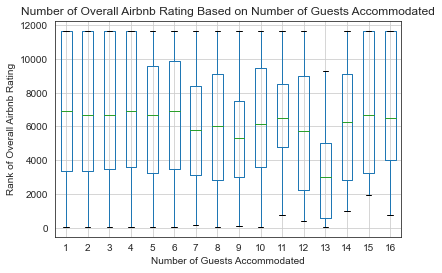

In [11]:
# Box plot of ratings by number of guests accommodated
airbnb_data.boxplot('rank_review_scores_rating', by = 'accommodates')
plt.title('Number of Overall Airbnb Rating Based on Number of Guests Accommodated')
plt.suptitle('')
plt.xlabel('Number of Guests Accommodated')
plt.ylabel('Rank of Overall Airbnb Rating')
plt.show()

The median rating ranks are all fairly consistent and leveled in the 6000-8000 range. The only exception was the Airbnbs accommodating 13 guests, which was rated much lower than the rest at around 3000. However, there are inherent issues with this boxplot because most of the Airbnb listings had a guest capacity around 2, whereas there are only a few entries that accommodated large numbers of guests.

**_Ratings by number of bedrooms:_**

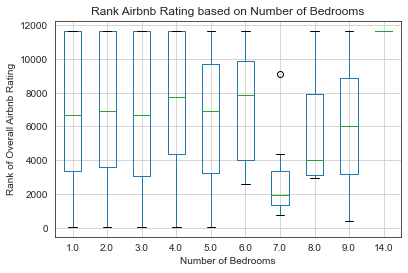

In [12]:
# Box plot of ratings by number of bedrooms
airbnb_data.boxplot('rank_review_scores_rating', by = 'bedrooms')
plt.title('Rank Airbnb Rating based on Number of Bedrooms')
plt.suptitle('')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Rank of Overall Airbnb Rating')
plt.show()

The boxplots show significant variability in the ranked ratings depending on the number of bedrooms, but the directional trend to the variation is not very clear. The ranked ratings for 7 bedroom listings are significantly lower than those for listings with less bedrooms, yet the ranked ratings for 8, 9, and 14 bedrooms increase greatly. Again, the boxplot may not be the most accurate representation of the data due to the large number of listings that have a small number of bedrooms and the small number of listings that have the larger numbers of bedrooms. 

**_Ratings by number of bathrooms:_**

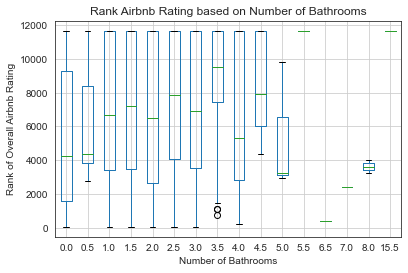

In [13]:
# Box plot of ratings by number of bathrooms
airbnb_data.boxplot('rank_review_scores_rating', by = 'bathrooms')
plt.title('Rank Airbnb Rating based on Number of Bathrooms')
plt.suptitle('')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Rank of Overall Airbnb Rating')
plt.show()

The boxplots do not communicate a strong relationship between the variables of ranked rating and number of bathrooms. Again, it is difficult to make generalizations from this visualization because there are very few data points at higher numbers of bathrooms. Ignoring the bathroom numbers that only had one data point (i.e. 5.5, 6.5, 7, and 10.5 bathrooms, which have only the median line), the remainder of the data seems to roughly indicate that more bathrooms is associated with higher ratings. However, this trend is not very distinguished and would need to be further analyzed with correlation statistics and regression analysis.

**_Ratings by amenities:_**

The impact of an amenity on the Airbnb's overall review rating was visualized by boxplots, where the box labeled "0" reflects that the listing did not have the amenity and the box labeled "1" reflects that the amenity was available. 

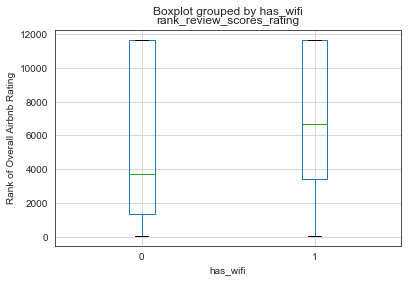

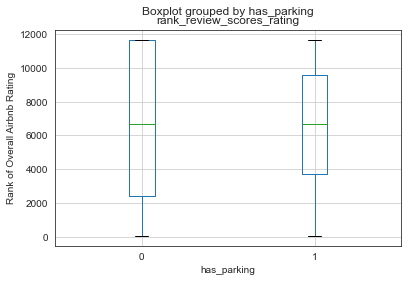

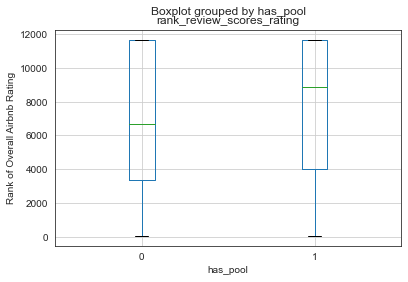

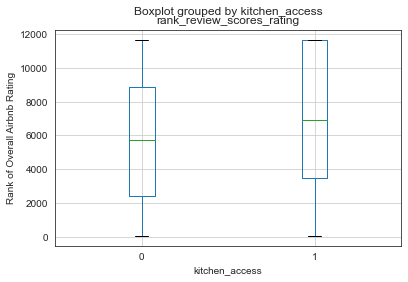

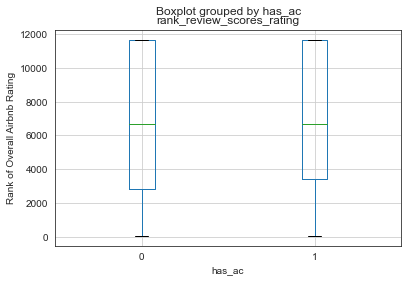

In [16]:
# Remove automatically generated (but harmless) warning
pd.set_option('mode.chained_assignment', None)

# Rank transformation of overall rating
airbnb_data['rank_review_scores_rating'] = airbnb_data['review_scores_rating'].rank()

# Selection for top amenities
top_amenities =  ['Wifi', 'parking','Pool','Kitchen','Air conditioning']
amenity_cols = ['has_wifi','has_parking','has_pool','kitchen_access', 'has_ac']

# Setting up the dataframe for amenity columns 
for col in amenity_cols:
    airbnb_data[col] = np.zeros(len(airbnb_data), dtype=int)

for x in range(len(top_amenities)):
    for row in airbnb_data.index:
        if top_amenities[x] in airbnb_data['amenities'][row]:
            airbnb_data[amenity_cols[x]][row] = 1
            
# Box plots of amenities against ranked review rating
for col in amenity_cols:
    airbnb_data.boxplot('rank_review_scores_rating', by = col)
    plt.xlabel(col)
    plt.ylabel('Rank of Overall Airbnb Rating')
    plt.show()

For this set of amenities, there were no boxplots where the interquartile ranges did not overlap depending on the presence of the amenity. However, all the amenities displayed a higher median and 25th quartile ranked rating for listings where they were present. Among the amenities, there presence of WiFi and pools showed the greatest impact in ranked ratings. However,  the amenities of parking, kitchen access, and air conditioning did not make much of a difference in the overall ratings, given that the medians and ranges were essentially unchanged.

### C. Boxplots of Ranked Ratings Based on Price

Since most Airbnb listings are concentrated at lower prices, we realized that setting bins of datapoints based on price intervals would result in an uneven data distribution. As such, we corrected for this by setting bins with smaller ranges of price intervals at the lower prices and generalizing all of the upper outliers into one bin.

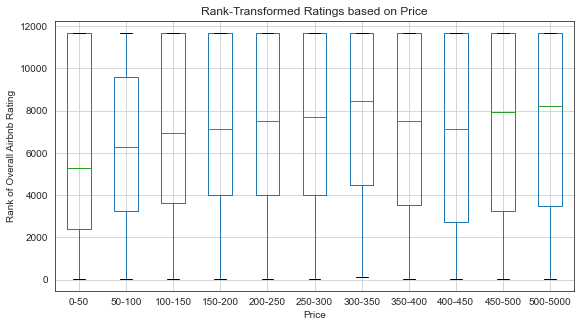

In [15]:
# Creation of price bins
price_interval = pd.cut(airbnb_data['price'],bins=[0,50,100,150,200,250,300,350,400,450,500,5000],labels=['0-50','50-100','100-150','150-200','200-250','250-300','300-350','350-400','400-450','450-500','500-5000'])
airbnb_data['price_interval'] = price_interval

# Boxplot of rank-transformed ratings by price
airbnb_data.boxplot('rank_review_scores_rating', by='price_interval', figsize=(9,5))
plt.title('Rank-Transformed Ratings based on Price')
plt.suptitle('')
plt.xlabel('Price')
plt.ylabel('Rank of Overall Airbnb Rating')
plt.show()

The boxplots do not show a strong relationship as all of the interquartile range boxes overlap, but the median values for ranked Airbnb ratings do appear to show a slight upward trend as price increases. The median ranked ratings consistently increase between the price bins from 0-50 and 300-350, but the median ranked ratings lowers slightly between the prices bins of 300-350 and 400-450. 